In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import skimage

MSSIM = 0.7046571789135052


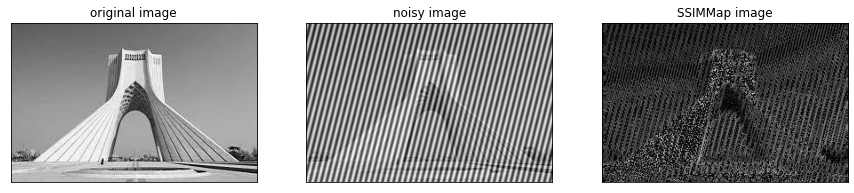

In [16]:
img = np.array(cv2.imread(filename="azadi_tower.jpg", flags=cv2.IMREAD_GRAYSCALE)).astype('uint8')
img_norm = np.array(cv2.normalize(img.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX))


[m, n] = img.shape
[a, b] = np.meshgrid(range(0, n), range(0, m))

periodic_noise = np.sin(a+b/4)+1
noisy_img = (img_norm + periodic_noise)/2
noisy_img = np.array(cv2.normalize(noisy_img.astype('float'), None, 0.0, 255.0, cv2.NORM_MINMAX)).astype('uint8')

win = np.ones((8,8))

# Constants in the SSIM index formula
C1 = 25
C2 = 25
C3 = 25

win = win/np.sum(win)

# Average of image 1
M1 = cv2.filter2D(img_norm, -1, win, borderType=cv2.BORDER_REPLICATE)
M1p2 = np.multiply(M1, M1)
# Average of image 2
M2 = cv2.filter2D(noisy_img, -1, win, borderType=cv2.BORDER_REPLICATE)
M2p2 = np.multiply(M2, M2)

M1_D_M2 = np.multiply(M1, M2)
# Variance of image 1
Var1p2 = cv2.filter2D(np.multiply(img_norm, img_norm), -1, win, borderType=cv2.BORDER_REPLICATE) - M1p2
# Variance of image 2
Var2p2 = cv2.filter2D(np.multiply(noisy_img, noisy_img), -1, win, borderType=cv2.BORDER_REPLICATE) - M2p2
# Covariance of image 2
Var12p2 = cv2.filter2D(np.multiply(img_norm, noisy_img), -1, win, borderType=cv2.BORDER_REPLICATE) - M1_D_M2


SSIMMap = ((2 * M1_D_M2 + C1) / (M1p2 + M2p2 + C1)) * \
          ((2 * np.sqrt(Var1p2) * np.sqrt(Var2p2) + C2) / (Var1p2 + Var2p2 + C2)) * \
          ((Var12p2 + C3) / (np.sqrt(Var1p2) * np.sqrt(Var2p2) + C3))

mssim = np.mean(np.mean(SSIMMap))

print("MSSIM = {}".format(mssim))

fig, axes= plt.subplots(1, 3, figsize=(15, 8))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('original image')

axes[1].imshow(noisy_img, cmap='gray')
axes[1].set_title('noisy image')

axes[2].imshow(SSIMMap, cmap='gray')
axes[2].set_title('SSIMMap image')

for ax in axes.ravel():
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

